In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
X = data.data
y = data.target

In [4]:
X = (X-X.min())/(X.max()-X.min())

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=81)

In [6]:
 df = pd.DataFrame(X, columns=data.feature_names)

In [7]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.641026,0.435897,0.166667,0.012821
1,0.615385,0.371795,0.166667,0.012821
2,0.589744,0.397436,0.153846,0.012821
3,0.576923,0.384615,0.179487,0.012821
4,0.628205,0.448718,0.166667,0.012821
...,...,...,...,...
145,0.846154,0.371795,0.653846,0.282051
146,0.794872,0.307692,0.628205,0.230769
147,0.820513,0.371795,0.653846,0.243590
148,0.782051,0.423077,0.679487,0.282051


In [8]:
df['target'] = y

In [9]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.641026,0.435897,0.166667,0.012821,0
1,0.615385,0.371795,0.166667,0.012821,0
2,0.589744,0.397436,0.153846,0.012821,0
3,0.576923,0.384615,0.179487,0.012821,0
4,0.628205,0.448718,0.166667,0.012821,0
...,...,...,...,...,...
145,0.846154,0.371795,0.653846,0.282051,2
146,0.794872,0.307692,0.628205,0.230769,2
147,0.820513,0.371795,0.653846,0.243590,2
148,0.782051,0.423077,0.679487,0.282051,2


In [10]:
model = RandomForestClassifier(n_estimators=4, random_state=81)

In [11]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=4, random_state=81)

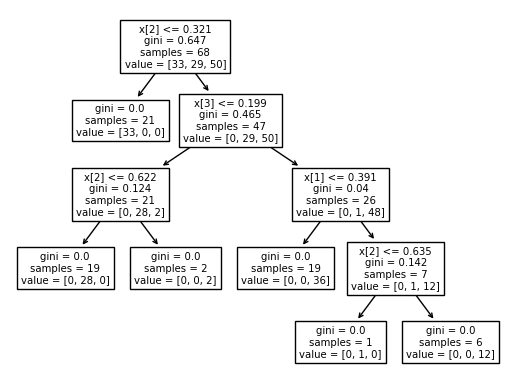

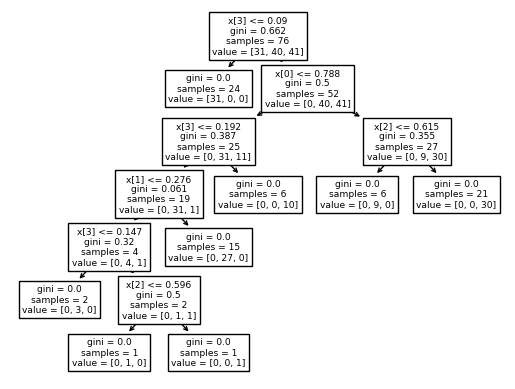

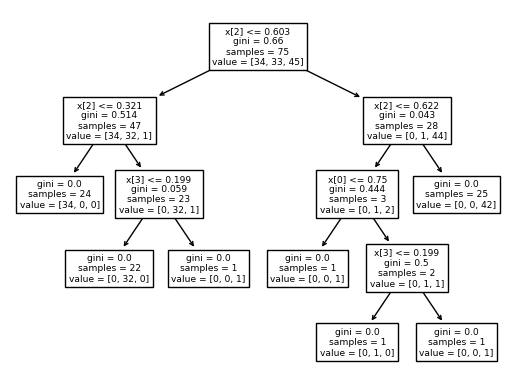

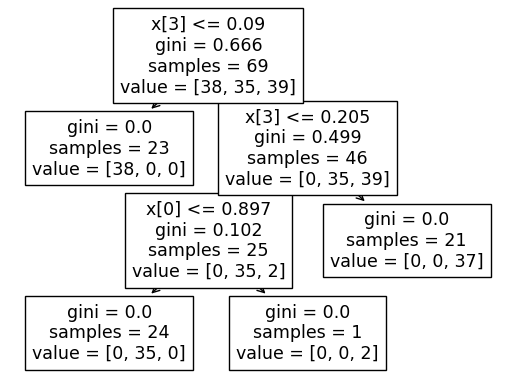

In [12]:
for i in range(0, model.n_estimators):
    plot_tree(model.estimators_[i])
    plt.show()

In [13]:
model.score(X_test, y_test)

0.9473684210526315

In [14]:
cls = model.predict([X[125], X[81], X[33], X[77], X[83]])
cls

array([2, 1, 0, 2, 1])

In [15]:
[data.target_names[i] for i in cls]

['virginica', 'versicolor', 'setosa', 'virginica', 'versicolor']

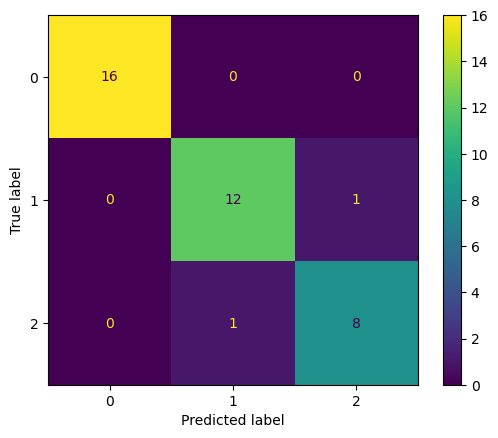

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, model.predict(X_test), labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()